In [1]:
#Visualisasi Tampilan data Wilayah Bogor (Kota dan Kabupaten)

#import module library
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [46]:
#baca data GEO dari file GEOJSON
country = geopandas.read_file("F:\jabar_digital_services\kota_kabupaten.geojson")
#drop kolom yang tidak digunakan
c1=country.drop(columns=['id', 'id_provinsi','kemendagri_kode'])
c1=c1[c1['bps_nama'].str.contains('BOGOR')]
c1.head()

,kemendagri_nama,bps_kode,bps_nama,geometry
20,KAB. BOGOR,3201,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
21,KOTA BOGOR,3271,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."


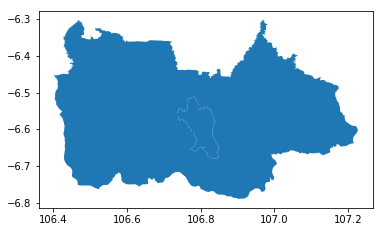

In [47]:
#plot peta
#Wilayah Besar adalah Kabupaten Bogor
#Wilayah Kecil yang ditengah2 adalah Kota Bogor
c1.plot()

In [27]:
#baca data pendukung mengenai prevalensi stunting dari csv
datafile = 'F:\jabar_digital_services\soal-01.csv'
df = pd.read_csv(datafile, names = ['provinsi', 'bps_kode', 'nama_kota_kabupaten', 'tahun','prevalensi_stunting'], skiprows = 1)
#drop kolom yang tidak digunakan
df = df.drop(['provinsi'], axis=1)
df=df[df['nama_kota_kabupaten'].str.contains('Bogor')]
df.head(6)

,bps_kode,nama_kota_kabupaten,tahun,prevalensi_stunting
0,3201,Kabupaten Bogor,2015,26.223776
1,3201,Kabupaten Bogor,2016,28.750000
2,3201,Kabupaten Bogor,2017,28.440340
54,3271,Kota Bogor,2015,10.416667
55,3271,Kota Bogor,2016,18.292683
56,3271,Kota Bogor,2017,25.000527


In [28]:
#melihat info dari variable objek c1
c1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2 entries, 20 to 21
Data columns (total 4 columns):
kemendagri_nama    2 non-null object
bps_kode           2 non-null object
bps_nama           2 non-null object
geometry           2 non-null object
dtypes: object(4)
memory usage: 80.0+ bytes


In [29]:
#pada output(28) terlihat bahwa kolom bps_kode belum diatur tipe data nya
#pengaturan tipe data ini untuk menjadi relasi join dari data geo (c1) ke data csv(df)
#convert data ke tipe data Integer
c1["bps_kode"] = c1['bps_kode'].apply(lambda x: np.int64(x))
c1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2 entries, 20 to 21
Data columns (total 4 columns):
kemendagri_nama    2 non-null object
bps_kode           2 non-null int64
bps_nama           2 non-null object
geometry           2 non-null object
dtypes: int64(1), object(3)
memory usage: 80.0+ bytes


In [30]:
#dilanjut dengan cek info data (df)
df.info()
#pada output(30) terlihat bahwa kolom bps_kode sudah bertipe data integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 56
Data columns (total 4 columns):
bps_kode               6 non-null int64
nama_kota_kabupaten    6 non-null object
tahun                  6 non-null int64
prevalensi_stunting    6 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 240.0+ bytes


In [31]:
#lanjutkan dengan join data dengan relasi bps_kode
merged = df.set_index('bps_kode').join(c1.set_index('bps_kode'))
merged.head(6)

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2015,26.223776,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3201,Kabupaten Bogor,2016,28.750000,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3201,Kabupaten Bogor,2017,28.440340,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3271,Kota Bogor,2015,10.416667,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."
3271,Kota Bogor,2016,18.292683,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."
3271,Kota Bogor,2017,25.000527,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."


In [32]:
#conversi kolom geometri dari Data Series menjadi Geo Series
merged = geopandas.GeoDataFrame(merged, geometry='geometry')
type(merged['geometry'])

geopandas.geoseries.GeoSeries

In [48]:
#filter data tahun 2015
merged2015=merged[merged['tahun']==2015]
merged2015.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2015,26.223776,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3271,Kota Bogor,2015,10.416667,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."


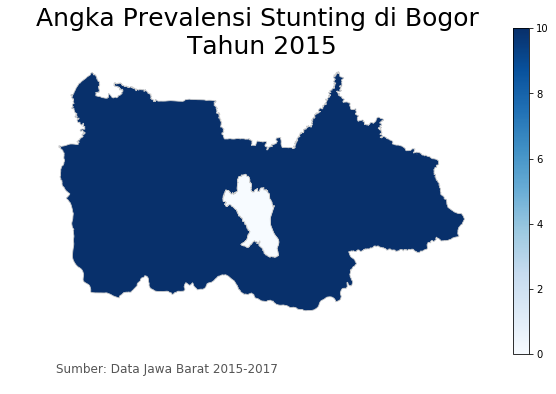

In [51]:
#Proses Mapping Peta Tahun 2015 dari data tahun 2015
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Bogor \nTahun 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged2015.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_2015.png", dpi=300)

In [52]:
#Pada Output Peta (39) terlihat bahwa jumlah nilai prevalensi Stunting di kota bogor lebih sedikit dari Kabupaten Bogor
# lanjut pada tahun 2016 dan 2017
merged2016=merged[merged['tahun']==2016]
merged2016.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2016,28.750000,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3271,Kota Bogor,2016,18.292683,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."


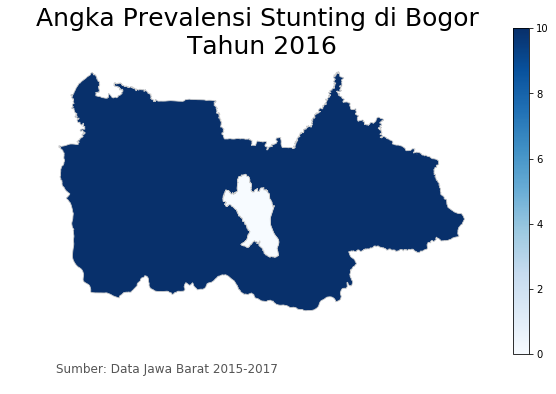

In [53]:
#Proses Mapping Peta Tahun 2016 dari data tahun 2016
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Bogor \nTahun 2016', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged2016.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_2016.png", dpi=300)

In [54]:
merged2017=merged[merged['tahun']==2017]
merged2017.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2017,28.440340,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3271,Kota Bogor,2017,25.000527,KOTA BOGOR,KOTA BOGOR,"(POLYGON ((106.782243773602 -6.5116950364586, ..."


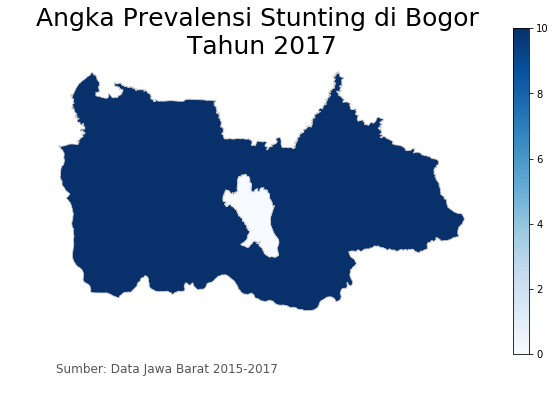

In [55]:
#Proses Mapping Peta Tahun 2017 dari data tahun 2017
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Bogor \nTahun 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged2017.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_2017.png", dpi=300)

In [56]:
#contoh berikutnya adalah mengambil seluruh wilayah di Jawa Barat sesuai dengan data berdasarkan tahun 2015-2017
#dimulai dari proses awal kembali
country = geopandas.read_file("F:\jabar_digital_services\kota_kabupaten.geojson")
#drop kolom yang tidak digunakan
c2=country.drop(columns=['id', 'id_provinsi','kemendagri_kode'])
c2.head()

,kemendagri_nama,bps_kode,bps_nama,geometry
0,KAB. PANGANDARAN,3218,PANGANDARAN,"(POLYGON ((108.669406931406 -7.46009431638431,..."
1,KAB. PURWAKARTA,3214,PURWAKARTA,"(POLYGON ((107.506416413609 -6.41126607484918,..."
2,KAB. INDRAMAYU,3212,INDRAMAYU,"(POLYGON ((108.367126536811 -6.27221763352043,..."
3,KAB. KARAWANG,3215,KARAWANG,"(POLYGON ((107.112310000002 -5.95516999989928,..."
4,KAB. CIAMIS,3207,CIAMIS,"(POLYGON ((108.441453136855 -7.54612529324705,..."


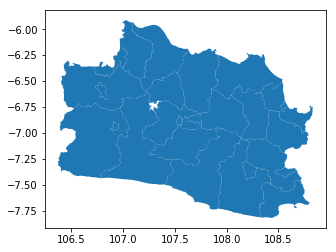

In [57]:
c2.plot()

In [58]:
datafile = 'F:\jabar_digital_services\soal-01.csv'
df1 = pd.read_csv(datafile, names = ['provinsi', 'bps_kode', 'nama_kota_kabupaten', 'tahun','prevalensi_stunting'], skiprows = 1)
#drop kolom yang tidak digunakan
df1 = df1.drop(['provinsi'], axis=1)
df1.head()

,bps_kode,nama_kota_kabupaten,tahun,prevalensi_stunting
0,3201,Kabupaten Bogor,2015,26.223776
1,3201,Kabupaten Bogor,2016,28.750000
2,3201,Kabupaten Bogor,2017,28.440340
3,3202,Kabupaten Sukabumi,2015,28.301887
4,3202,Kabupaten Sukabumi,2016,25.242718


In [59]:
c2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
kemendagri_nama    27 non-null object
bps_kode           27 non-null object
bps_nama           27 non-null object
geometry           27 non-null object
dtypes: object(4)
memory usage: 944.0+ bytes


In [60]:
c2["bps_kode"] = c2['bps_kode'].apply(lambda x: np.int64(x))
c2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
kemendagri_nama    27 non-null object
bps_kode           27 non-null int64
bps_nama           27 non-null object
geometry           27 non-null object
dtypes: int64(1), object(3)
memory usage: 944.0+ bytes


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
bps_kode               81 non-null int64
nama_kota_kabupaten    81 non-null object
tahun                  81 non-null int64
prevalensi_stunting    81 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ KB


In [62]:
merged2 = df1.set_index('bps_kode').join(c2.set_index('bps_kode'))
merged2.head(6)

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2015,26.223776,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3201,Kabupaten Bogor,2016,28.750000,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3201,Kabupaten Bogor,2017,28.440340,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3202,Kabupaten Sukabumi,2015,28.301887,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
3202,Kabupaten Sukabumi,2016,25.242718,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
3202,Kabupaten Sukabumi,2017,37.617645,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."


In [63]:
merged2= geopandas.GeoDataFrame(merged2, geometry='geometry')
type(merged2['geometry'])

geopandas.geoseries.GeoSeries

In [64]:
#filter data tahun 2015
merged22015=merged2[merged2['tahun']==2015]
merged22015.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2015,26.223776,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3202,Kabupaten Sukabumi,2015,28.301887,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
3203,Kabupaten Cianjur,2015,36.526946,KAB. CIANJUR,CIANJUR,"(POLYGON ((107.230209481309 -6.60494007985326,..."
3204,Kabupaten Bandung,2015,32.835821,KAB. BANDUNG,BANDUNG,"(POLYGON ((107.733093362465 -6.81399609410255,..."
3205,Kabupaten Garut,2015,33.742331,KAB. GARUT,GARUT,"(POLYGON ((107.918159571828 -6.94759587691624,..."


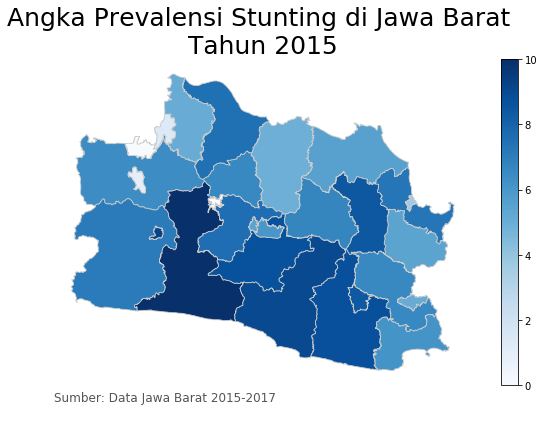

In [65]:
#Proses Mapping Peta Tahun 2015 dari data tahun 2015 seluruh wilayah di Jawa Barat
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Jawa Barat \nTahun 2015', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged22015.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_jabar_2015.png", dpi=300)

In [66]:
#filter data tahun 2016
merged22016=merged2[merged2['tahun']==2016]
merged22016.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2016,28.750000,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3202,Kabupaten Sukabumi,2016,25.242718,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
3203,Kabupaten Cianjur,2016,33.040936,KAB. CIANJUR,CIANJUR,"(POLYGON ((107.230209481309 -6.60494007985326,..."
3204,Kabupaten Bandung,2016,32.121212,KAB. BANDUNG,BANDUNG,"(POLYGON ((107.733093362465 -6.81399609410255,..."
3205,Kabupaten Garut,2016,24.922118,KAB. GARUT,GARUT,"(POLYGON ((107.918159571828 -6.94759587691624,..."


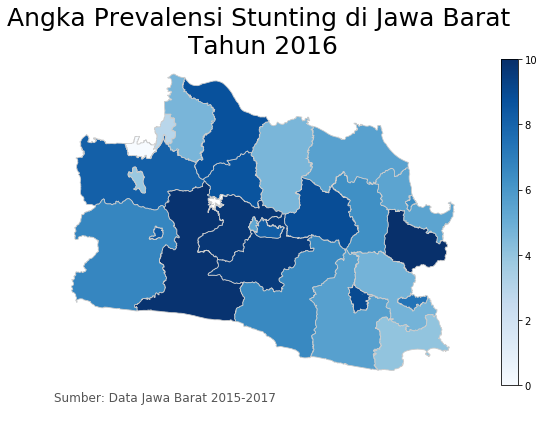

In [67]:
#Proses Mapping Peta Tahun 2016 dari data tahun 2016 seluruh wilayah di Jawa Barat
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Jawa Barat \nTahun 2016', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged22016.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_jabar_2016.png", dpi=300)

In [68]:
#filter data tahun 2017
merged22017=merged2[merged2['tahun']==2017]
merged22017.head()

,nama_kota_kabupaten,tahun,prevalensi_stunting,kemendagri_nama,bps_nama,geometry
bps_kode,,,,,,
3201,Kabupaten Bogor,2017,28.440340,KAB. BOGOR,BOGOR,"(POLYGON ((106.47144392265 -6.30845650741959, ..."
3202,Kabupaten Sukabumi,2017,37.617645,KAB. SUKABUMI,SUKABUMI,"(POLYGON ((106.741523942441 -6.71556328298331,..."
3203,Kabupaten Cianjur,2017,35.714353,KAB. CIANJUR,CIANJUR,"(POLYGON ((107.230209481309 -6.60494007985326,..."
3204,Kabupaten Bandung,2017,38.699558,KAB. BANDUNG,BANDUNG,"(POLYGON ((107.733093362465 -6.81399609410255,..."
3205,Kabupaten Garut,2017,43.167625,KAB. GARUT,GARUT,"(POLYGON ((107.918159571828 -6.94759587691624,..."


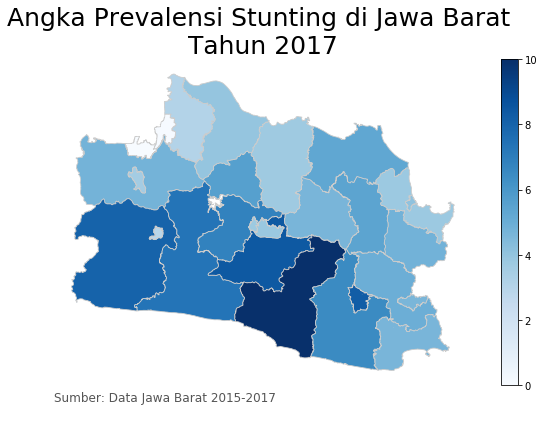

In [69]:
#Proses Mapping Peta Tahun 2017 dari data tahun 2017 seluruh wilayah di Jawa Barat
# set a variable that will call whatever column we want to visualise on the map
variable = 'prevalensi_stunting'
# set the range for the choropleth
vmin, vmax = 0, 10
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
# add a title
ax.set_title('Angka Prevalensi Stunting di Jawa Barat \nTahun 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Sumber: Data Jawa Barat 2015-2017',xy=(0.1,.08),xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged22017.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
#Hasil di simpan dalam bentuk image
fig.savefig("F:\jabar_digital_services\map_export_jabar_2017.png", dpi=300)